# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data
## DTSC 680: Applied Machine Learning

## Name: 

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [26]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV  

In [28]:
data= pd.read_csv("2DLinear.csv")
X = data.x
y = data.y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Plot Data

Simply plot your training data here in order to create the plot below.

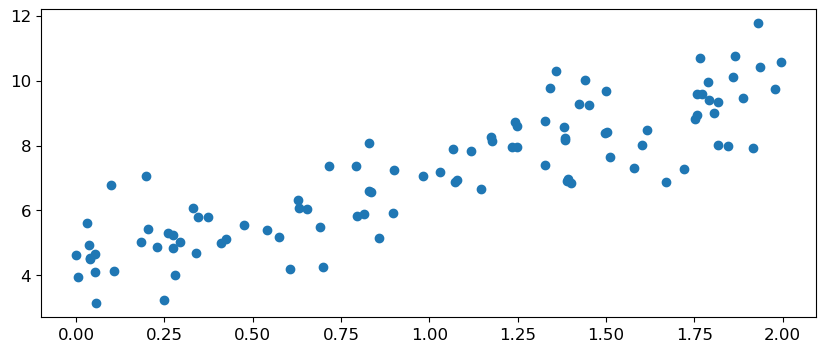

In [29]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train)
plt.show()

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordnigly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = [0.1,0.3,0.5,0.7,0.9,1.0]`
 - `max_depth = [2,4,6,8,10,12]`
 - `n_estimators = [10,25,50,100,150]`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = 0.1`
 - `max_depth = 2`
 - `n_estimators = 50`
 - `random_state = 42`

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=50, random_state=42)

### Plot Model Predictions for Training Set

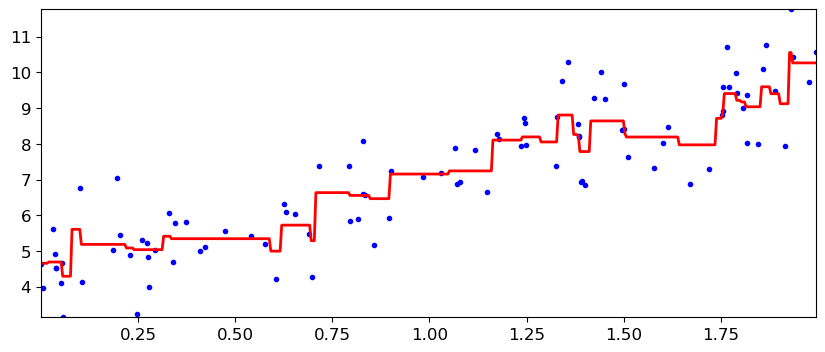

In [31]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(gbrt, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split = [4,6,8,10,14,20]`
 - `max_depth = [1,2,4,5,10,11]`
 - `n_estimators = [10,20,30,40,50,60,70,80,90]`
 - `random_state = 42`

Initial "best values":
 - `min_samples_split = 12`
 - `max_depth = 6`
 - `n_estimators = 60`
 - `random_state = 42`

In [32]:
rfr = RandomForestRegressor(min_samples_split = 12, max_depth = 6, n_estimators = 60, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_split=12, n_estimators=60,
                      random_state=42)

### Plot Model Predictions for Training Set

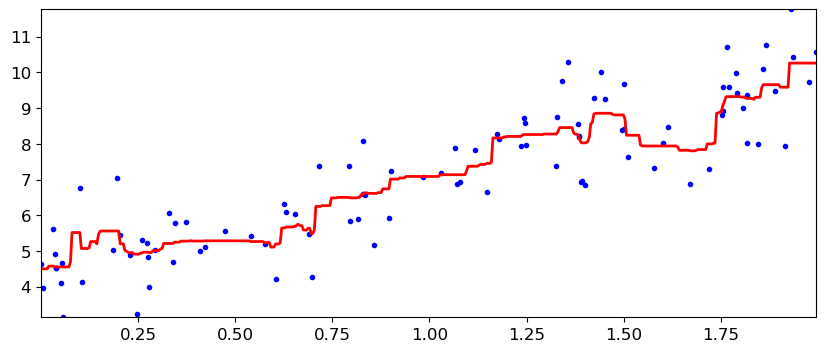

In [33]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(rfr, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = ['best','random']`
 - `max_depth = [2,4,5,7,9,10,12]`
 - `min_samples_split = [5,10,15,20]`
 - `random_state = 42`

Initial "best values":
 - `splitter = ['random']`
 - `max_depth = 5`
 - `min_samples_split = 18`
 - `random_state = 42`

In [34]:
dtr = DecisionTreeRegressor(random_state=42, splitter = 'random', max_depth = 5, min_samples_split = 18)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=18, random_state=42,
                      splitter='random')

### Plot Model Predictions for Training Set

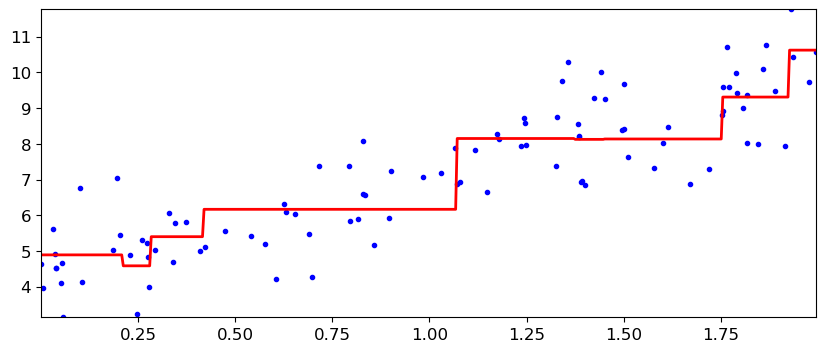

In [35]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(dtr, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial (course-grained) stint of grid searching. Note that these are NOT upper bounds for the further refined grid searches. If your initial search returns the upper bound of your values, you can (and should) search further above and below that value. You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.) 

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [36]:
# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

param_grid = {
    'max_depth':[8,12,16],
    'n_estimators': [50,200,350,500,650,800,1000],
    'learning_rate':[0.01, 0.15, 0.45, 0.75, 0.95, 1]
    }

grid_search_cv =  GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 200}


In [12]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid = {
    'max_depth':[8,10,12],
    'n_estimators': [100,150,200,250,300],
    'learning_rate':[0.01, 0.05, 0.15]
    }

grid_search_cv =  GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 150}


In [37]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid = {
    'max_depth':[8,9,10],
    'n_estimators': [100,150,200],
    'learning_rate':[0.01, 0.02, 0.3]
    }

grid_search_cv =  GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 150}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = 0.1`
- `max_depth = 10`
- `n_estimators = 150`

In [38]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid = {
    'max_depth':[4,12,20,28,32],
    'n_estimators': [50,200,350,500,650,800,1000],
    'min_samples_split':[2,6,10,14,16,20]
    }

grid_search_cv =  GridSearchCV(RandomForestRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'max_depth': 12, 'min_samples_split': 16, 'n_estimators': 50}


In [39]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

param_grid = {
    'max_depth':[8,10,12,14,16],
    'n_estimators': [25,50,75],
    'min_samples_split':[14,15,16,17,18]
    }

grid_search_cv =  GridSearchCV(RandomForestRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'max_depth': 8, 'min_samples_split': 18, 'n_estimators': 50}


In [40]:
# -----
# Final RandomForestRegressor GridSearch
# -----

param_grid = {
    'max_depth':[7,8,9],
    'n_estimators': [40,50,60],
    'min_samples_split':[17,18,19]
    }

grid_search_cv =  GridSearchCV(RandomForestRegressor(random_state=42), param_grid)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

The best parameters are:  {'max_depth': 7, 'min_samples_split': 18, 'n_estimators': 50}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 7`
- `n_estimators = 50`
- `min_samples_split = 18`

In [41]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid = {
    'splitter':['best','random'],
    'max_depth':[8,12,16,20,24,28,32],
    'min_samples_split': [2,4,6,8,10,12,14,16,18,20]
    }

grid_search_cv =  GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 140 candidates, totalling 420 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 10, 'splitter': 'best'}


In [42]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----

param_grid = {
    'splitter':['best','random'],
    'max_depth':[8,9,10,11],
    'min_samples_split': [8,9,10,11,12]
    }

grid_search_cv =  GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 10, 'splitter': 'best'}


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = best`
- `max_depth = 8`
- `min_samples_split = 10`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [43]:
gbrt = GradientBoostingRegressor(max_depth=9, n_estimators=150, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, n_estimators=150, random_state=42)

### Plot Model Predictions for Training Set

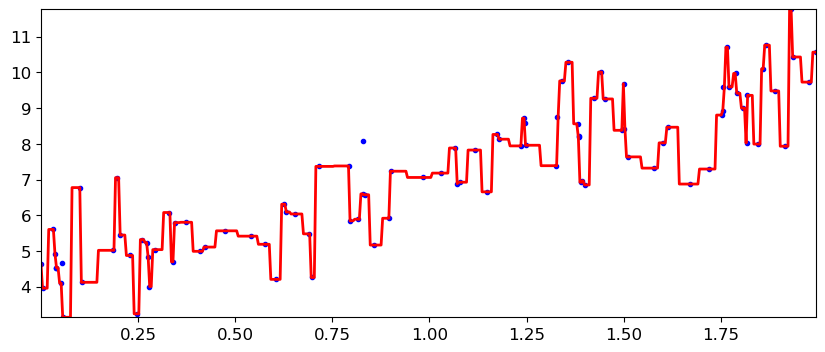

In [44]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(gbrt, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

### Create Optimal RandomForestRegressor Model

In [45]:
rfr = RandomForestRegressor(min_samples_split = 18, max_depth = 7, n_estimators = 50, random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=18, n_estimators=50,
                      random_state=42)

### Plot Model Predictions for Training Set

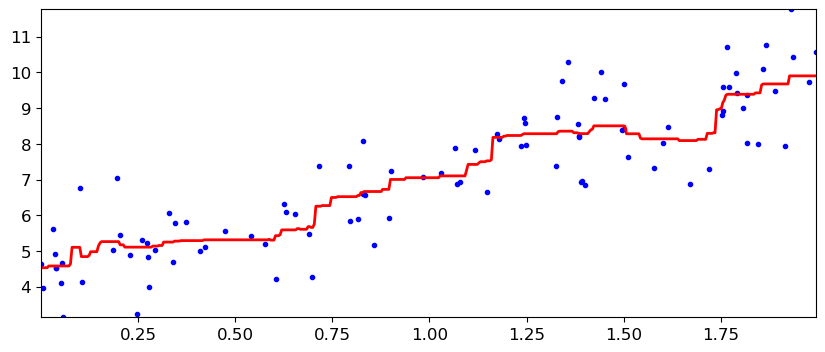

In [46]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(rfr, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

### Create Optimal DecisionTreeRegressor Model

In [47]:
dtr = DecisionTreeRegressor(random_state=42, splitter = 'best', max_depth = 8, min_samples_split = 10)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=42)

### Plot Model Predictions for Training Set

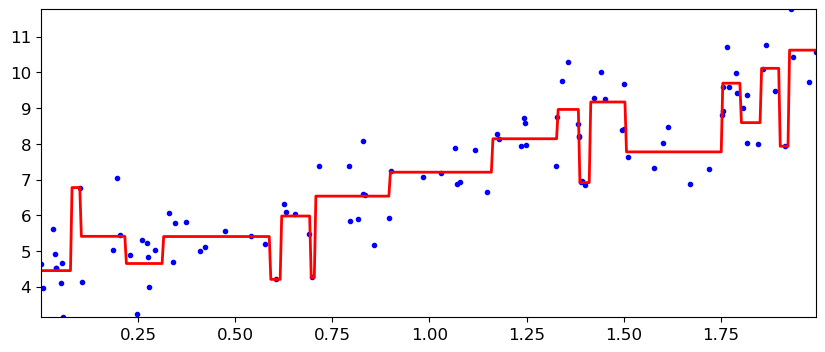

In [48]:
fix, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)
plot_predictions(dtr, X_train, y_train, axes=[X_train.min(), X_train.max(), y_train.min(), y_train.max()])

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for all three models.

In [61]:
from sklearn.metrics import mean_squared_error

In [65]:
#GradientBoostingRegressor
y_pred = gbrt.predict(X_test)
gbrt_error = round(mean_squared_error(y_test, y_pred), 4)
gbrt_error

1.3523

In [66]:
#RandomForestRegressor
y_pred = rfr.predict(X_test)
rfr_error = round(mean_squared_error(y_test, y_pred), 4)
rfr_error

1.2683

In [69]:
# DecisionTreeRegressor
y_pred = dtr.predict(X_test)
dtr_error = round(mean_squared_error(y_test, y_pred), 4)
dtr_error

1.5376

# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for **meaningful content** here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


The DecisionTreeRegressor is straightforward but prone to overfitting, while RandomForestRegressor has less overfitting but is harder to interpret. GradientBoostingRegressor is powerful but has overfitting issues and requires more computation, making interpretation challenging.

Using the same scatter plot, all three regression models were applied to plot a line of fitness. After implementing various algorithms, it was clear that the GradientBoostingRegressor produced the most accurate line of fit among the scatter points. For the measurement of generalization error, the RandomForestRegressor demonstrated the lowest mean squared error.

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


I highly recommend utilizing the GradientBoostingRegressor model as it has proven to surpass all other models with noticeable significance. Its regression line is closely aligned with the scatter plot, showcasing its exceptional fit to the data.